In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_classification

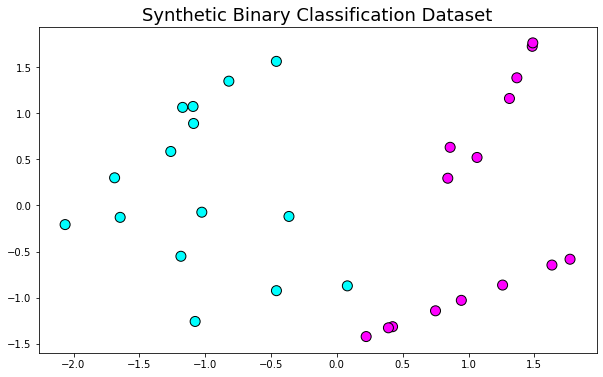

In [2]:
X, y = make_classification(n_samples=30, n_features=2,
                           n_informative=2, n_redundant=0, n_repeated=0, n_classes=2,random_state=82)
plt.figure(figsize=(10,6))
plt.title("Synthetic Binary Classification Dataset", fontsize=18)
plt.scatter(X[:,0], X[:,1], c=y, cmap='cool', s=100, edgecolors="k")

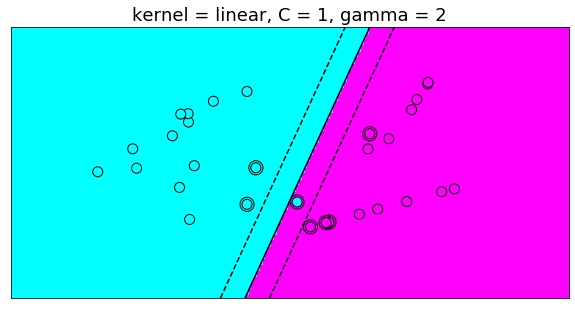

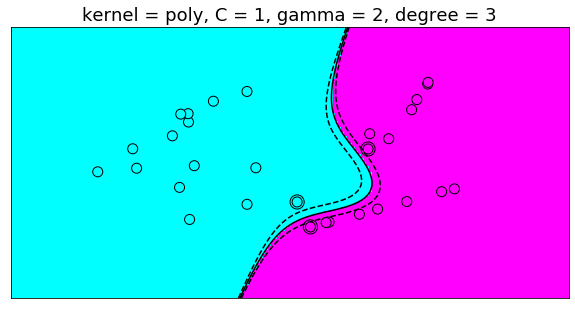

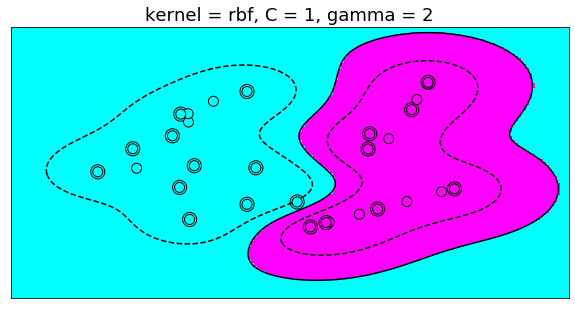

In [3]:
# figure number
fignum = 1

# fit the model
for kernel in ("linear", "poly", "rbf"):
    clf = svm.SVC(kernel=kernel, gamma=2)
    clf.fit(X,y)

#     plot the line, the points, and the nearest vectors to the plane
    plt.figure(fignum, figsize=(10, 5))
    plt.clf()

    plt.scatter(
        clf.support_vectors_[:, 0],
        clf.support_vectors_[:, 1],
        s=200,
        facecolors="none",
        zorder=10,
        edgecolors="k",
    )
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, s=100, cmap='cool', edgecolors="k")

    plt.axis("tight")
    x_min = -3
    x_max = 3
    y_min = -3
    y_max = 3

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.figure(fignum, figsize=(4, 3))
    plt.pcolormesh(XX, YY, Z > 0, cmap='cool')
    plt.contour(
        XX,
        YY,
        Z,
        colors=["k", "k", "k"],
        linestyles=["--", "-", "--"],
        levels=[-0.5, 0, 0.5],
    )

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xticks(())
    plt.yticks(())
    if kernel == 'poly':
        plt.title("kernel = " + kernel + ", C = 1, gamma = 2, degree = 3", fontsize=18)
    else:
        plt.title("kernel = " + kernel + ", C = 1, gamma = 2", fontsize=18)
    fignum = fignum + 1
plt.show()